# Setting up environment

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
sys.path.insert(0, os.path.abspath("../nsforest/nsforesting"))
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from IPython.display import Image
import nsforest as ns
from nsforest import preprocessing as pp
from nsforest.preprocessing import _add_ann
from nsforest import nsforesting
from nsforest import plotting as pl
from nsforest.plotting import _make_plots

# Data Exploration

In [2]:
# Loading h5ad
data_folder = "../demo_data/"
file = data_folder + "adata_layer1.h5ad"
adata = sc.read_h5ad(file)
adata

AnnData object with n_obs × n_vars = 871 × 16497
    obs: 'cluster'

In [3]:
cluster_header = "cluster"

In [4]:
# Looking at sample labels (obs_names)
adata.obs_names

Index(['A01_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A01_BCH3_1NeuNP_H200.1030_MTG_Layer_1',
       'A02_BCH1_1NeuNP_H200.1025_MTG_layer_1',
       'A03_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A04_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A04_BCH1_1NeuNP_H200.1025_MTG_layer_1',
       'A04_BCH3_1NeuNP_H200.1030_MTG_Layer_1',
       'A05_1_Nuclei_NeuNP_H200_1025_MTG_layer1_BCH9',
       'A05_BCH1_1NeuNP_H200.1025_MTG_layer_1',
       'A05_BCH3_1NeuNP_H200.1030_MTG_Layer_1',
       ...
       'P09_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH7',
       'P09_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH9',
       'P09_1_Nuclei_NeuNN_H200_1030_MTG_layer1_BCH8',
       'P09_BCH1_1NeuNN_H200.1025_MTG_layer_1',
       'P10_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH6',
       'P10_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH9',
       'P10_BCH1_1NeuNN_H200.1025_MTG_layer_1',
       'P11_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH7',
       'P11_1_Nuclei_NeuNN_H200_1025_MTG_layer1_BCH9',


In [5]:
# Looking at genes (var_names)
# Note: make sure the var_names isn't the ensembl_id
# adata.var_names = adata.var["feature_name"]
adata.var_names

Index(['A1CF', 'A2M', 'A2M_AS1', 'A2ML1', 'A2ML1_AS1', 'A2MP1', 'A3GALT2',
       'A4GALT', 'AAAS', 'AACS',
       ...
       'ZUFSP', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=16497)

In [6]:
# Checking cell annotation (cluster) sizes 
adata.obs[cluster_header].value_counts()

e1_e299_SLC17A7_L5b_Cdh13     299
i1_i90_COL5A2_Ndnf_Car4        90
i2_i77_LHX6_Sst_Cbln4          77
i3_i56_BAGE2_Ndnf_Cxcl14       56
i4_i54_MC4R_Ndnf_Cxcl14        54
g1_g48_GLI3_Astro_Gja1         48
i5_i47_TRPC3_Ndnf_Car4         47
i6_i44_GPR149_Vip_Mybpc1       44
i7_i31_CLMP_Ndnf_Cxcl14        31
g2_g27_APBB1IP_Micro_Ctss      27
i8_i27_SNCG_Vip_Mybpc1         27
i9_i22_TAC3_Vip_Mybpc1         22
g3_g18_GPNMB_OPC_Pdgfra        18
i10_i16_TSPAN12_Vip_Mybpc1     16
g4_g9_MOG_Oligo_Opalin          9
i11_i6_EGF_Vip_Mybpc1           6
Name: cluster, dtype: int64

# Preprocessing

In [7]:
medians_header = "medians_" + cluster_header
binary_scores_header = "binary_scores_cluster"

In [8]:
ns.pp.prep_medians(adata, cluster_header)
ns.pp.prep_binary_scores(adata, cluster_header, medians_header)
ns.pp.dendrogram(adata, cluster_header)

Calculating medians...


Calculating medians per cluster: 100%|██████████| 16/16 [00:00<00:00, 34.91it/s]


Saving calculated medians as... adata.varm.medians_cluster
--- 0.47897934913635254 seconds ---
Only positive genes selected. 11688 positive genes out of 16497 total genes
Calculating binary scores...


Calculating binary scores per cluster: 100%|██████████| 16/16 [01:43<00:00,  6.49s/it]


Saving calculated binary scores as... adata.varm.binary_scores_cluster
--- 104.47002339363098 seconds ---
median: 0.0
mean: 0.1428629848824932
std: 0.23137174460615756
         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\Users\bpeng\AppData\Local\anaconda3\Lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 871 × 16497
    obs: 'cluster'
    uns: 'dendrogram_cluster'
    obsm: 'X_pca'
    varm: 'medians_cluster', 'binary_scores_cluster'

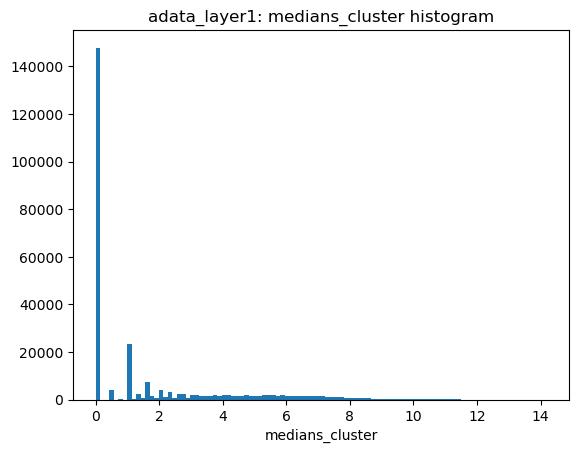

In [9]:
a = plt.hist(adata.varm[medians_header].unstack(), bins = 100)
a = plt.title(f'{file.split("/")[-1].replace(".h5ad", "")}: {medians_header} histogram')
a = plt.xlabel(medians_header)

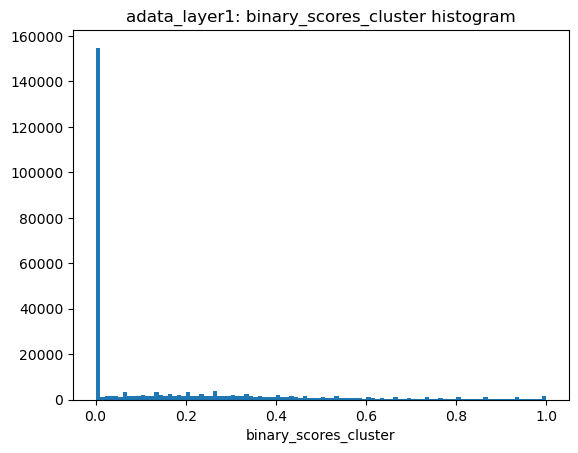

In [10]:
a = plt.hist(adata.varm[binary_scores_header].unstack(), bins = 100)
a = plt.title(f'{file.split("/")[-1].replace(".h5ad", "")}: {binary_scores_header} histogram')
a = plt.xlabel(binary_scores_header)

In [11]:
# Saving as new h5ad
filename = file.replace(".h5ad", "_preprocessed.h5ad")
print(f"Saving new anndata object as...\n{filename}")
adata.write_h5ad(filename)

Saving new anndata object as...
../demo_data/adata_layer1_preprocessed.h5ad


# Running NSForest

##### Note: Skip if input marker list csv is included

In [12]:
# Setting up directory structure
outputfilename = cluster_header
output_folder = "../outputs_layer1/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Creating new directory...\n{output_folder}")
medians_header = "medians_" + cluster_header
binary_scores_header = "binary_scores_cluster"

In [13]:
results = nsforesting.NSForest(adata, cluster_header, medians_header, binary_scores_header, output_folder, cluster_header)

Preparing adata...
--- 0.005983829498291016 seconds ---
Pre-selecting genes based on binary scores...
	 Threshold (mean + 2 * std): 0.6056064740948083
	 Average number of genes after gene_selection in each cluster: 1081.3125
Saving number of genes selected per cluster as... ../outputs_layer1/cluster_gene_selection.csv
Number of clusters to evaluate: 16


running NSForest on all clusters:   0%|          | 0/16 [00:00<?, ?it/s]

1 out of 16:
	e1_e299_SLC17A7_L5b_Cdh13
	 Pre-selected 2040 genes to feed into Random Forest.
COMBINATIONS: [['SLC17A7'], ['LINC00508'], ['LINC00507'], ['KIAA1211L'], ['TESPA1'], ['SATB2'], ['SLC17A7', 'LINC00508'], ['SLC17A7', 'LINC00507'], ['SLC17A7', 'KIAA1211L'], ['SLC17A7', 'TESPA1'], ['SLC17A7', 'SATB2'], ['LINC00508', 'LINC00507'], ['LINC00508', 'KIAA1211L'], ['LINC00508', 'TESPA1'], ['LINC00508', 'SATB2'], ['LINC00507', 'KIAA1211L'], ['LINC00507', 'TESPA1'], ['LINC00507', 'SATB2'], ['KIAA1211L', 'TESPA1'], ['KIAA1211L', 'SATB2'], ['TESPA1', 'SATB2'], ['SLC17A7', 'LINC00508', 'LINC00507'], ['SLC17A7', 'LINC00508', 'KIAA1211L'], ['SLC17A7', 'LINC00508', 'TESPA1'], ['SLC17A7', 'LINC00508', 'SATB2'], ['SLC17A7', 'LINC00507', 'KIAA1211L'], ['SLC17A7', 'LINC00507', 'TESPA1'], ['SLC17A7', 'LINC00507', 'SATB2'], ['SLC17A7', 'KIAA1211L', 'TESPA1'], ['SLC17A7', 'KIAA1211L', 'SATB2'], ['SLC17A7', 'TESPA1', 'SATB2'], ['LINC00508', 'LINC00507', 'KIAA1211L'], ['LINC00508', 'LINC00507', 'TESP

running NSForest on all clusters:   6%|▋         | 1/16 [00:08<02:11,  8.77s/it]

	['TESPA1', 'SATB2']
	fbeta: 0.9850034083162916
2 out of 16:
	g1_g48_GLI3_Astro_Gja1
	 Pre-selected 728 genes to feed into Random Forest.
COMBINATIONS: [['SLC25A18'], ['LINC00498'], ['EMX2OS'], ['F3'], ['PAMR1'], ['RANBP3L'], ['SLC25A18', 'LINC00498'], ['SLC25A18', 'EMX2OS'], ['SLC25A18', 'F3'], ['SLC25A18', 'PAMR1'], ['SLC25A18', 'RANBP3L'], ['LINC00498', 'EMX2OS'], ['LINC00498', 'F3'], ['LINC00498', 'PAMR1'], ['LINC00498', 'RANBP3L'], ['EMX2OS', 'F3'], ['EMX2OS', 'PAMR1'], ['EMX2OS', 'RANBP3L'], ['F3', 'PAMR1'], ['F3', 'RANBP3L'], ['PAMR1', 'RANBP3L'], ['SLC25A18', 'LINC00498', 'EMX2OS'], ['SLC25A18', 'LINC00498', 'F3'], ['SLC25A18', 'LINC00498', 'PAMR1'], ['SLC25A18', 'LINC00498', 'RANBP3L'], ['SLC25A18', 'EMX2OS', 'F3'], ['SLC25A18', 'EMX2OS', 'PAMR1'], ['SLC25A18', 'EMX2OS', 'RANBP3L'], ['SLC25A18', 'F3', 'PAMR1'], ['SLC25A18', 'F3', 'RANBP3L'], ['SLC25A18', 'PAMR1', 'RANBP3L'], ['LINC00498', 'EMX2OS', 'F3'], ['LINC00498', 'EMX2OS', 'PAMR1'], ['LINC00498', 'EMX2OS', 'RANBP3L'], ['

running NSForest on all clusters:  12%|█▎        | 2/16 [00:13<01:31,  6.52s/it]

	['LINC00498']
	fbeta: 0.9500000000000001
3 out of 16:
	g2_g27_APBB1IP_Micro_Ctss
	 Pre-selected 485 genes to feed into Random Forest.
COMBINATIONS: [['INPP5D'], ['PLCG2'], ['CSF2RA'], ['ADAM28'], ['FLI1'], ['CD74'], ['INPP5D', 'PLCG2'], ['INPP5D', 'CSF2RA'], ['INPP5D', 'ADAM28'], ['INPP5D', 'FLI1'], ['INPP5D', 'CD74'], ['PLCG2', 'CSF2RA'], ['PLCG2', 'ADAM28'], ['PLCG2', 'FLI1'], ['PLCG2', 'CD74'], ['CSF2RA', 'ADAM28'], ['CSF2RA', 'FLI1'], ['CSF2RA', 'CD74'], ['ADAM28', 'FLI1'], ['ADAM28', 'CD74'], ['FLI1', 'CD74'], ['INPP5D', 'PLCG2', 'CSF2RA'], ['INPP5D', 'PLCG2', 'ADAM28'], ['INPP5D', 'PLCG2', 'FLI1'], ['INPP5D', 'PLCG2', 'CD74'], ['INPP5D', 'CSF2RA', 'ADAM28'], ['INPP5D', 'CSF2RA', 'FLI1'], ['INPP5D', 'CSF2RA', 'CD74'], ['INPP5D', 'ADAM28', 'FLI1'], ['INPP5D', 'ADAM28', 'CD74'], ['INPP5D', 'FLI1', 'CD74'], ['PLCG2', 'CSF2RA', 'ADAM28'], ['PLCG2', 'CSF2RA', 'FLI1'], ['PLCG2', 'CSF2RA', 'CD74'], ['PLCG2', 'ADAM28', 'FLI1'], ['PLCG2', 'ADAM28', 'CD74'], ['PLCG2', 'FLI1', 'CD74'], ['CS

running NSForest on all clusters:  19%|█▉        | 3/16 [00:17<01:08,  5.26s/it]

	['CSF2RA', 'ADAM28']
	fbeta: 0.9756097560975611
4 out of 16:
	g3_g18_GPNMB_OPC_Pdgfra
	 Pre-selected 453 genes to feed into Random Forest.
COMBINATIONS: [['GPNMB'], ['STK32A'], ['COL20A1'], ['OLIG2'], ['KLRC3'], ['B3GNT7'], ['GPNMB', 'STK32A'], ['GPNMB', 'COL20A1'], ['GPNMB', 'OLIG2'], ['GPNMB', 'KLRC3'], ['GPNMB', 'B3GNT7'], ['STK32A', 'COL20A1'], ['STK32A', 'OLIG2'], ['STK32A', 'KLRC3'], ['STK32A', 'B3GNT7'], ['COL20A1', 'OLIG2'], ['COL20A1', 'KLRC3'], ['COL20A1', 'B3GNT7'], ['OLIG2', 'KLRC3'], ['OLIG2', 'B3GNT7'], ['KLRC3', 'B3GNT7'], ['GPNMB', 'STK32A', 'COL20A1'], ['GPNMB', 'STK32A', 'OLIG2'], ['GPNMB', 'STK32A', 'KLRC3'], ['GPNMB', 'STK32A', 'B3GNT7'], ['GPNMB', 'COL20A1', 'OLIG2'], ['GPNMB', 'COL20A1', 'KLRC3'], ['GPNMB', 'COL20A1', 'B3GNT7'], ['GPNMB', 'OLIG2', 'KLRC3'], ['GPNMB', 'OLIG2', 'B3GNT7'], ['GPNMB', 'KLRC3', 'B3GNT7'], ['STK32A', 'COL20A1', 'OLIG2'], ['STK32A', 'COL20A1', 'KLRC3'], ['STK32A', 'COL20A1', 'B3GNT7'], ['STK32A', 'OLIG2', 'KLRC3'], ['STK32A', 'OLIG2', 'B

running NSForest on all clusters:  25%|██▌       | 4/16 [00:21<00:57,  4.79s/it]

	['GPNMB', 'OLIG2']
	fbeta: 0.8620689655172413
5 out of 16:
	g4_g9_MOG_Oligo_Opalin
	 Pre-selected 693 genes to feed into Random Forest.
COMBINATIONS: [['ST18'], ['MOBP'], ['CNDP1'], ['FOLH1'], ['MOG'], ['CD22'], ['ST18', 'MOBP'], ['ST18', 'CNDP1'], ['ST18', 'FOLH1'], ['ST18', 'MOG'], ['ST18', 'CD22'], ['MOBP', 'CNDP1'], ['MOBP', 'FOLH1'], ['MOBP', 'MOG'], ['MOBP', 'CD22'], ['CNDP1', 'FOLH1'], ['CNDP1', 'MOG'], ['CNDP1', 'CD22'], ['FOLH1', 'MOG'], ['FOLH1', 'CD22'], ['MOG', 'CD22'], ['ST18', 'MOBP', 'CNDP1'], ['ST18', 'MOBP', 'FOLH1'], ['ST18', 'MOBP', 'MOG'], ['ST18', 'MOBP', 'CD22'], ['ST18', 'CNDP1', 'FOLH1'], ['ST18', 'CNDP1', 'MOG'], ['ST18', 'CNDP1', 'CD22'], ['ST18', 'FOLH1', 'MOG'], ['ST18', 'FOLH1', 'CD22'], ['ST18', 'MOG', 'CD22'], ['MOBP', 'CNDP1', 'FOLH1'], ['MOBP', 'CNDP1', 'MOG'], ['MOBP', 'CNDP1', 'CD22'], ['MOBP', 'FOLH1', 'MOG'], ['MOBP', 'FOLH1', 'CD22'], ['MOBP', 'MOG', 'CD22'], ['CNDP1', 'FOLH1', 'MOG'], ['CNDP1', 'FOLH1', 'CD22'], ['CNDP1', 'MOG', 'CD22'], ['FOLH1'

running NSForest on all clusters:  31%|███▏      | 5/16 [00:26<00:52,  4.73s/it]

	['ST18']
	fbeta: 1.0
6 out of 16:
	i10_i16_TSPAN12_Vip_Mybpc1
	 Pre-selected 1456 genes to feed into Random Forest.
COMBINATIONS: [['TSPAN12'], ['LINC01539'], ['TMC5'], ['CHRNB3'], ['FAM46A'], ['ANGPT1'], ['TSPAN12', 'LINC01539'], ['TSPAN12', 'TMC5'], ['TSPAN12', 'CHRNB3'], ['TSPAN12', 'FAM46A'], ['TSPAN12', 'ANGPT1'], ['LINC01539', 'TMC5'], ['LINC01539', 'CHRNB3'], ['LINC01539', 'FAM46A'], ['LINC01539', 'ANGPT1'], ['TMC5', 'CHRNB3'], ['TMC5', 'FAM46A'], ['TMC5', 'ANGPT1'], ['CHRNB3', 'FAM46A'], ['CHRNB3', 'ANGPT1'], ['FAM46A', 'ANGPT1'], ['TSPAN12', 'LINC01539', 'TMC5'], ['TSPAN12', 'LINC01539', 'CHRNB3'], ['TSPAN12', 'LINC01539', 'FAM46A'], ['TSPAN12', 'LINC01539', 'ANGPT1'], ['TSPAN12', 'TMC5', 'CHRNB3'], ['TSPAN12', 'TMC5', 'FAM46A'], ['TSPAN12', 'TMC5', 'ANGPT1'], ['TSPAN12', 'CHRNB3', 'FAM46A'], ['TSPAN12', 'CHRNB3', 'ANGPT1'], ['TSPAN12', 'FAM46A', 'ANGPT1'], ['LINC01539', 'TMC5', 'CHRNB3'], ['LINC01539', 'TMC5', 'FAM46A'], ['LINC01539', 'TMC5', 'ANGPT1'], ['LINC01539', 'CHRNB3

running NSForest on all clusters:  38%|███▊      | 6/16 [00:32<00:53,  5.39s/it]

	['TSPAN12', 'CHRNB3']
	fbeta: 0.8035714285714286
7 out of 16:
	i11_i6_EGF_Vip_Mybpc1
	 Pre-selected 2399 genes to feed into Random Forest.
COMBINATIONS: [['FZD8'], ['EGF'], ['KCNJ2_AS1'], ['ZSCAN23'], ['FBRSL1'], ['RPL23AP32'], ['FZD8', 'EGF'], ['FZD8', 'KCNJ2_AS1'], ['FZD8', 'ZSCAN23'], ['FZD8', 'FBRSL1'], ['FZD8', 'RPL23AP32'], ['EGF', 'KCNJ2_AS1'], ['EGF', 'ZSCAN23'], ['EGF', 'FBRSL1'], ['EGF', 'RPL23AP32'], ['KCNJ2_AS1', 'ZSCAN23'], ['KCNJ2_AS1', 'FBRSL1'], ['KCNJ2_AS1', 'RPL23AP32'], ['ZSCAN23', 'FBRSL1'], ['ZSCAN23', 'RPL23AP32'], ['FBRSL1', 'RPL23AP32'], ['FZD8', 'EGF', 'KCNJ2_AS1'], ['FZD8', 'EGF', 'ZSCAN23'], ['FZD8', 'EGF', 'FBRSL1'], ['FZD8', 'EGF', 'RPL23AP32'], ['FZD8', 'KCNJ2_AS1', 'ZSCAN23'], ['FZD8', 'KCNJ2_AS1', 'FBRSL1'], ['FZD8', 'KCNJ2_AS1', 'RPL23AP32'], ['FZD8', 'ZSCAN23', 'FBRSL1'], ['FZD8', 'ZSCAN23', 'RPL23AP32'], ['FZD8', 'FBRSL1', 'RPL23AP32'], ['EGF', 'KCNJ2_AS1', 'ZSCAN23'], ['EGF', 'KCNJ2_AS1', 'FBRSL1'], ['EGF', 'KCNJ2_AS1', 'RPL23AP32'], ['EGF', 'ZSCAN2

running NSForest on all clusters:  44%|████▍     | 7/16 [00:39<00:51,  5.67s/it]

	['EGF', 'FBRSL1']
	fbeta: 0.7142857142857143
8 out of 16:
	i1_i90_COL5A2_Ndnf_Car4
	 Pre-selected 479 genes to feed into Random Forest.
COMBINATIONS: [['NMBR'], ['COL5A2'], ['SST'], ['CBLN4'], ['NPNT'], ['NDNF'], ['NMBR', 'COL5A2'], ['NMBR', 'SST'], ['NMBR', 'CBLN4'], ['NMBR', 'NPNT'], ['NMBR', 'NDNF'], ['COL5A2', 'SST'], ['COL5A2', 'CBLN4'], ['COL5A2', 'NPNT'], ['COL5A2', 'NDNF'], ['SST', 'CBLN4'], ['SST', 'NPNT'], ['SST', 'NDNF'], ['CBLN4', 'NPNT'], ['CBLN4', 'NDNF'], ['NPNT', 'NDNF'], ['NMBR', 'COL5A2', 'SST'], ['NMBR', 'COL5A2', 'CBLN4'], ['NMBR', 'COL5A2', 'NPNT'], ['NMBR', 'COL5A2', 'NDNF'], ['NMBR', 'SST', 'CBLN4'], ['NMBR', 'SST', 'NPNT'], ['NMBR', 'SST', 'NDNF'], ['NMBR', 'CBLN4', 'NPNT'], ['NMBR', 'CBLN4', 'NDNF'], ['NMBR', 'NPNT', 'NDNF'], ['COL5A2', 'SST', 'CBLN4'], ['COL5A2', 'SST', 'NPNT'], ['COL5A2', 'SST', 'NDNF'], ['COL5A2', 'CBLN4', 'NPNT'], ['COL5A2', 'CBLN4', 'NDNF'], ['COL5A2', 'NPNT', 'NDNF'], ['SST', 'CBLN4', 'NPNT'], ['SST', 'CBLN4', 'NDNF'], ['SST', 'NPNT', 'N

running NSForest on all clusters:  50%|█████     | 8/16 [00:45<00:46,  5.84s/it]

	['COL5A2', 'NDNF']
	fbeta: 0.8798882681564246
9 out of 16:
	i2_i77_LHX6_Sst_Cbln4
	 Pre-selected 522 genes to feed into Random Forest.
COMBINATIONS: [['LHX6'], ['FLT3'], ['TAC1'], ['CALB1'], ['TRBC2'], ['RSPO3'], ['LHX6', 'FLT3'], ['LHX6', 'TAC1'], ['LHX6', 'CALB1'], ['LHX6', 'TRBC2'], ['LHX6', 'RSPO3'], ['FLT3', 'TAC1'], ['FLT3', 'CALB1'], ['FLT3', 'TRBC2'], ['FLT3', 'RSPO3'], ['TAC1', 'CALB1'], ['TAC1', 'TRBC2'], ['TAC1', 'RSPO3'], ['CALB1', 'TRBC2'], ['CALB1', 'RSPO3'], ['TRBC2', 'RSPO3'], ['LHX6', 'FLT3', 'TAC1'], ['LHX6', 'FLT3', 'CALB1'], ['LHX6', 'FLT3', 'TRBC2'], ['LHX6', 'FLT3', 'RSPO3'], ['LHX6', 'TAC1', 'CALB1'], ['LHX6', 'TAC1', 'TRBC2'], ['LHX6', 'TAC1', 'RSPO3'], ['LHX6', 'CALB1', 'TRBC2'], ['LHX6', 'CALB1', 'RSPO3'], ['LHX6', 'TRBC2', 'RSPO3'], ['FLT3', 'TAC1', 'CALB1'], ['FLT3', 'TAC1', 'TRBC2'], ['FLT3', 'TAC1', 'RSPO3'], ['FLT3', 'CALB1', 'TRBC2'], ['FLT3', 'CALB1', 'RSPO3'], ['FLT3', 'TRBC2', 'RSPO3'], ['TAC1', 'CALB1', 'TRBC2'], ['TAC1', 'CALB1', 'RSPO3'], ['TAC1',

running NSForest on all clusters:  56%|█████▋    | 9/16 [00:51<00:42,  6.08s/it]

	['LHX6']
	fbeta: 0.8166189111747851
10 out of 16:
	i3_i56_BAGE2_Ndnf_Cxcl14
	 Pre-selected 311 genes to feed into Random Forest.
COMBINATIONS: [['BAGE2'], ['SCN5A'], ['GREM2'], ['SYT10'], ['ARHGAP18'], ['GRB14'], ['BAGE2', 'SCN5A'], ['BAGE2', 'GREM2'], ['BAGE2', 'SYT10'], ['BAGE2', 'ARHGAP18'], ['BAGE2', 'GRB14'], ['SCN5A', 'GREM2'], ['SCN5A', 'SYT10'], ['SCN5A', 'ARHGAP18'], ['SCN5A', 'GRB14'], ['GREM2', 'SYT10'], ['GREM2', 'ARHGAP18'], ['GREM2', 'GRB14'], ['SYT10', 'ARHGAP18'], ['SYT10', 'GRB14'], ['ARHGAP18', 'GRB14'], ['BAGE2', 'SCN5A', 'GREM2'], ['BAGE2', 'SCN5A', 'SYT10'], ['BAGE2', 'SCN5A', 'ARHGAP18'], ['BAGE2', 'SCN5A', 'GRB14'], ['BAGE2', 'GREM2', 'SYT10'], ['BAGE2', 'GREM2', 'ARHGAP18'], ['BAGE2', 'GREM2', 'GRB14'], ['BAGE2', 'SYT10', 'ARHGAP18'], ['BAGE2', 'SYT10', 'GRB14'], ['BAGE2', 'ARHGAP18', 'GRB14'], ['SCN5A', 'GREM2', 'SYT10'], ['SCN5A', 'GREM2', 'ARHGAP18'], ['SCN5A', 'GREM2', 'GRB14'], ['SCN5A', 'SYT10', 'ARHGAP18'], ['SCN5A', 'SYT10', 'GRB14'], ['SCN5A', 'ARHGAP1

running NSForest on all clusters:  62%|██████▎   | 10/16 [00:58<00:37,  6.24s/it]

	['BAGE2', 'SYT10']
	fbeta: 0.78125
11 out of 16:
	i4_i54_MC4R_Ndnf_Cxcl14
	 Pre-selected 412 genes to feed into Random Forest.
COMBINATIONS: [['ARHGAP36'], ['MC4R'], ['COBLL1'], ['LINC01435'], ['ADAM33'], ['FAM19A4'], ['ARHGAP36', 'MC4R'], ['ARHGAP36', 'COBLL1'], ['ARHGAP36', 'LINC01435'], ['ARHGAP36', 'ADAM33'], ['ARHGAP36', 'FAM19A4'], ['MC4R', 'COBLL1'], ['MC4R', 'LINC01435'], ['MC4R', 'ADAM33'], ['MC4R', 'FAM19A4'], ['COBLL1', 'LINC01435'], ['COBLL1', 'ADAM33'], ['COBLL1', 'FAM19A4'], ['LINC01435', 'ADAM33'], ['LINC01435', 'FAM19A4'], ['ADAM33', 'FAM19A4'], ['ARHGAP36', 'MC4R', 'COBLL1'], ['ARHGAP36', 'MC4R', 'LINC01435'], ['ARHGAP36', 'MC4R', 'ADAM33'], ['ARHGAP36', 'MC4R', 'FAM19A4'], ['ARHGAP36', 'COBLL1', 'LINC01435'], ['ARHGAP36', 'COBLL1', 'ADAM33'], ['ARHGAP36', 'COBLL1', 'FAM19A4'], ['ARHGAP36', 'LINC01435', 'ADAM33'], ['ARHGAP36', 'LINC01435', 'FAM19A4'], ['ARHGAP36', 'ADAM33', 'FAM19A4'], ['MC4R', 'COBLL1', 'LINC01435'], ['MC4R', 'COBLL1', 'ADAM33'], ['MC4R', 'COBLL1', '

running NSForest on all clusters:  69%|██████▉   | 11/16 [01:04<00:30,  6.18s/it]

	['ARHGAP36', 'ADAM33', 'FAM19A4']
	fbeta: 0.8707865168539326
12 out of 16:
	i5_i47_TRPC3_Ndnf_Car4
	 Pre-selected 1524 genes to feed into Random Forest.
COMBINATIONS: [['SSTR2'], ['KIRREL'], ['TRPC3'], ['NTNG1'], ['TARID'], ['EYA4'], ['SSTR2', 'KIRREL'], ['SSTR2', 'TRPC3'], ['SSTR2', 'NTNG1'], ['SSTR2', 'TARID'], ['SSTR2', 'EYA4'], ['KIRREL', 'TRPC3'], ['KIRREL', 'NTNG1'], ['KIRREL', 'TARID'], ['KIRREL', 'EYA4'], ['TRPC3', 'NTNG1'], ['TRPC3', 'TARID'], ['TRPC3', 'EYA4'], ['NTNG1', 'TARID'], ['NTNG1', 'EYA4'], ['TARID', 'EYA4'], ['SSTR2', 'KIRREL', 'TRPC3'], ['SSTR2', 'KIRREL', 'NTNG1'], ['SSTR2', 'KIRREL', 'TARID'], ['SSTR2', 'KIRREL', 'EYA4'], ['SSTR2', 'TRPC3', 'NTNG1'], ['SSTR2', 'TRPC3', 'TARID'], ['SSTR2', 'TRPC3', 'EYA4'], ['SSTR2', 'NTNG1', 'TARID'], ['SSTR2', 'NTNG1', 'EYA4'], ['SSTR2', 'TARID', 'EYA4'], ['KIRREL', 'TRPC3', 'NTNG1'], ['KIRREL', 'TRPC3', 'TARID'], ['KIRREL', 'TRPC3', 'EYA4'], ['KIRREL', 'NTNG1', 'TARID'], ['KIRREL', 'NTNG1', 'EYA4'], ['KIRREL', 'TARID', 'EYA4']

running NSForest on all clusters:  75%|███████▌  | 12/16 [01:13<00:28,  7.11s/it]

	['NTNG1', 'EYA4']
	fbeta: 0.9064327485380117
13 out of 16:
	i6_i44_GPR149_Vip_Mybpc1
	 Pre-selected 670 genes to feed into Random Forest.
COMBINATIONS: [['PLCE1_AS1'], ['FLT1'], ['CXCL12'], ['SLC22A3'], ['GPR149'], ['SHISA8'], ['PLCE1_AS1', 'FLT1'], ['PLCE1_AS1', 'CXCL12'], ['PLCE1_AS1', 'SLC22A3'], ['PLCE1_AS1', 'GPR149'], ['PLCE1_AS1', 'SHISA8'], ['FLT1', 'CXCL12'], ['FLT1', 'SLC22A3'], ['FLT1', 'GPR149'], ['FLT1', 'SHISA8'], ['CXCL12', 'SLC22A3'], ['CXCL12', 'GPR149'], ['CXCL12', 'SHISA8'], ['SLC22A3', 'GPR149'], ['SLC22A3', 'SHISA8'], ['GPR149', 'SHISA8'], ['PLCE1_AS1', 'FLT1', 'CXCL12'], ['PLCE1_AS1', 'FLT1', 'SLC22A3'], ['PLCE1_AS1', 'FLT1', 'GPR149'], ['PLCE1_AS1', 'FLT1', 'SHISA8'], ['PLCE1_AS1', 'CXCL12', 'SLC22A3'], ['PLCE1_AS1', 'CXCL12', 'GPR149'], ['PLCE1_AS1', 'CXCL12', 'SHISA8'], ['PLCE1_AS1', 'SLC22A3', 'GPR149'], ['PLCE1_AS1', 'SLC22A3', 'SHISA8'], ['PLCE1_AS1', 'GPR149', 'SHISA8'], ['FLT1', 'CXCL12', 'SLC22A3'], ['FLT1', 'CXCL12', 'GPR149'], ['FLT1', 'CXCL12', 'SHISA

running NSForest on all clusters:  81%|████████▏ | 13/16 [01:21<00:21,  7.16s/it]

	['FLT1', 'GPR149']
	fbeta: 0.7916666666666666
14 out of 16:
	i7_i31_CLMP_Ndnf_Cxcl14
	 Pre-selected 1605 genes to feed into Random Forest.
COMBINATIONS: [['KIAA1644'], ['FGF10'], ['CLMP'], ['PAX6'], ['SP8'], ['CPLX3'], ['KIAA1644', 'FGF10'], ['KIAA1644', 'CLMP'], ['KIAA1644', 'PAX6'], ['KIAA1644', 'SP8'], ['KIAA1644', 'CPLX3'], ['FGF10', 'CLMP'], ['FGF10', 'PAX6'], ['FGF10', 'SP8'], ['FGF10', 'CPLX3'], ['CLMP', 'PAX6'], ['CLMP', 'SP8'], ['CLMP', 'CPLX3'], ['PAX6', 'SP8'], ['PAX6', 'CPLX3'], ['SP8', 'CPLX3'], ['KIAA1644', 'FGF10', 'CLMP'], ['KIAA1644', 'FGF10', 'PAX6'], ['KIAA1644', 'FGF10', 'SP8'], ['KIAA1644', 'FGF10', 'CPLX3'], ['KIAA1644', 'CLMP', 'PAX6'], ['KIAA1644', 'CLMP', 'SP8'], ['KIAA1644', 'CLMP', 'CPLX3'], ['KIAA1644', 'PAX6', 'SP8'], ['KIAA1644', 'PAX6', 'CPLX3'], ['KIAA1644', 'SP8', 'CPLX3'], ['FGF10', 'CLMP', 'PAX6'], ['FGF10', 'CLMP', 'SP8'], ['FGF10', 'CLMP', 'CPLX3'], ['FGF10', 'PAX6', 'SP8'], ['FGF10', 'PAX6', 'CPLX3'], ['FGF10', 'SP8', 'CPLX3'], ['CLMP', 'PAX6', 'S

running NSForest on all clusters:  88%|████████▊ | 14/16 [01:29<00:15,  7.54s/it]

	['PAX6', 'CPLX3']
	fbeta: 0.8260869565217391
15 out of 16:
	i8_i27_SNCG_Vip_Mybpc1
	 Pre-selected 2042 genes to feed into Random Forest.
COMBINATIONS: [['SNCG'], ['EDNRA'], ['MMRN2'], ['FBN3'], ['KCNK2'], ['SCML4'], ['SNCG', 'EDNRA'], ['SNCG', 'MMRN2'], ['SNCG', 'FBN3'], ['SNCG', 'KCNK2'], ['SNCG', 'SCML4'], ['EDNRA', 'MMRN2'], ['EDNRA', 'FBN3'], ['EDNRA', 'KCNK2'], ['EDNRA', 'SCML4'], ['MMRN2', 'FBN3'], ['MMRN2', 'KCNK2'], ['MMRN2', 'SCML4'], ['FBN3', 'KCNK2'], ['FBN3', 'SCML4'], ['KCNK2', 'SCML4'], ['SNCG', 'EDNRA', 'MMRN2'], ['SNCG', 'EDNRA', 'FBN3'], ['SNCG', 'EDNRA', 'KCNK2'], ['SNCG', 'EDNRA', 'SCML4'], ['SNCG', 'MMRN2', 'FBN3'], ['SNCG', 'MMRN2', 'KCNK2'], ['SNCG', 'MMRN2', 'SCML4'], ['SNCG', 'FBN3', 'KCNK2'], ['SNCG', 'FBN3', 'SCML4'], ['SNCG', 'KCNK2', 'SCML4'], ['EDNRA', 'MMRN2', 'FBN3'], ['EDNRA', 'MMRN2', 'KCNK2'], ['EDNRA', 'MMRN2', 'SCML4'], ['EDNRA', 'FBN3', 'KCNK2'], ['EDNRA', 'FBN3', 'SCML4'], ['EDNRA', 'KCNK2', 'SCML4'], ['MMRN2', 'FBN3', 'KCNK2'], ['MMRN2', 'FBN3', 

running NSForest on all clusters:  94%|█████████▍| 15/16 [01:39<00:08,  8.27s/it]

	['SNCG', 'EDNRA']
	fbeta: 0.759493670886076
16 out of 16:
	i9_i22_TAC3_Vip_Mybpc1
	 Pre-selected 1482 genes to feed into Random Forest.
COMBINATIONS: [['BSPRY'], ['MCTP2'], ['OFD1P9Y'], ['OFD1P15Y'], ['VWC2L_IT1'], ['IQGAP2'], ['BSPRY', 'MCTP2'], ['BSPRY', 'OFD1P9Y'], ['BSPRY', 'OFD1P15Y'], ['BSPRY', 'VWC2L_IT1'], ['BSPRY', 'IQGAP2'], ['MCTP2', 'OFD1P9Y'], ['MCTP2', 'OFD1P15Y'], ['MCTP2', 'VWC2L_IT1'], ['MCTP2', 'IQGAP2'], ['OFD1P9Y', 'OFD1P15Y'], ['OFD1P9Y', 'VWC2L_IT1'], ['OFD1P9Y', 'IQGAP2'], ['OFD1P15Y', 'VWC2L_IT1'], ['OFD1P15Y', 'IQGAP2'], ['VWC2L_IT1', 'IQGAP2'], ['BSPRY', 'MCTP2', 'OFD1P9Y'], ['BSPRY', 'MCTP2', 'OFD1P15Y'], ['BSPRY', 'MCTP2', 'VWC2L_IT1'], ['BSPRY', 'MCTP2', 'IQGAP2'], ['BSPRY', 'OFD1P9Y', 'OFD1P15Y'], ['BSPRY', 'OFD1P9Y', 'VWC2L_IT1'], ['BSPRY', 'OFD1P9Y', 'IQGAP2'], ['BSPRY', 'OFD1P15Y', 'VWC2L_IT1'], ['BSPRY', 'OFD1P15Y', 'IQGAP2'], ['BSPRY', 'VWC2L_IT1', 'IQGAP2'], ['MCTP2', 'OFD1P9Y', 'OFD1P15Y'], ['MCTP2', 'OFD1P9Y', 'VWC2L_IT1'], ['MCTP2', 'OFD1P9Y', 'I

running NSForest on all clusters: 100%|██████████| 16/16 [01:46<00:00,  6.65s/it]

	['MCTP2', 'IQGAP2']
	fbeta: 0.7926829268292683
Saving supplementary table as...
../outputs_layer1/cluster_supplementary.csv
Saving markers table as...
../outputs_layer1/cluster_markers.csv
Saving results table as...
../outputs_layer1/cluster_results.csv
Saving final results table as...
../outputs_layer1/cluster_results.csv
--- 106.45388746261597 seconds ---


# Computing decision trees with input marker list

In [ ]:
# marker_list_csv = "../outputs_layer1/cluster_results.csv"
# marker_list_csv_col_cluster = "clusterName"
# marker_list_csv_col_markers = "NSForest_markers"
# marker_dict = utils.prepare_markers(marker_list_csv, marker_list_csv_col_cluster, marker_list_csv_col_markers, 
#                                     output_folder, outputfilename)

# Plotting

In [2]:
# If you just want to plot without running nsforest or decision trees
cluster_header = "cluster"
medians_header = "medians_" + cluster_header
binary_scores_header = "binary_scores_cluster"
outputfilename = cluster_header
output_folder = "../outputs_layer1/"
file = "../demo_data/adata_layer1_preprocessed.h5ad"
adata = sc.read_h5ad(file)
results = pd.read_csv(output_folder + outputfilename + "_results.csv")

In [3]:
ns.pl.boxplot(results, output_folder, outputfilename)
ns.pl.scatter_w_clusterSize(results, output_folder, outputfilename)

Saving... ../outputs_layer1/cluster_boxplot_fscore.html
Saving... ../outputs_layer1/cluster_boxplot_ppv.html
Saving... ../outputs_layer1/cluster_boxplot_fraction.html
Saving... ../outputs_layer1/cluster_scatter_fscore.html
Saving... ../outputs_layer1/cluster_scatter_ppv.html
Saving... ../outputs_layer1/cluster_scatter_fraction.html


C:\Users\bpeng\AppData\Local\anaconda3\Lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored



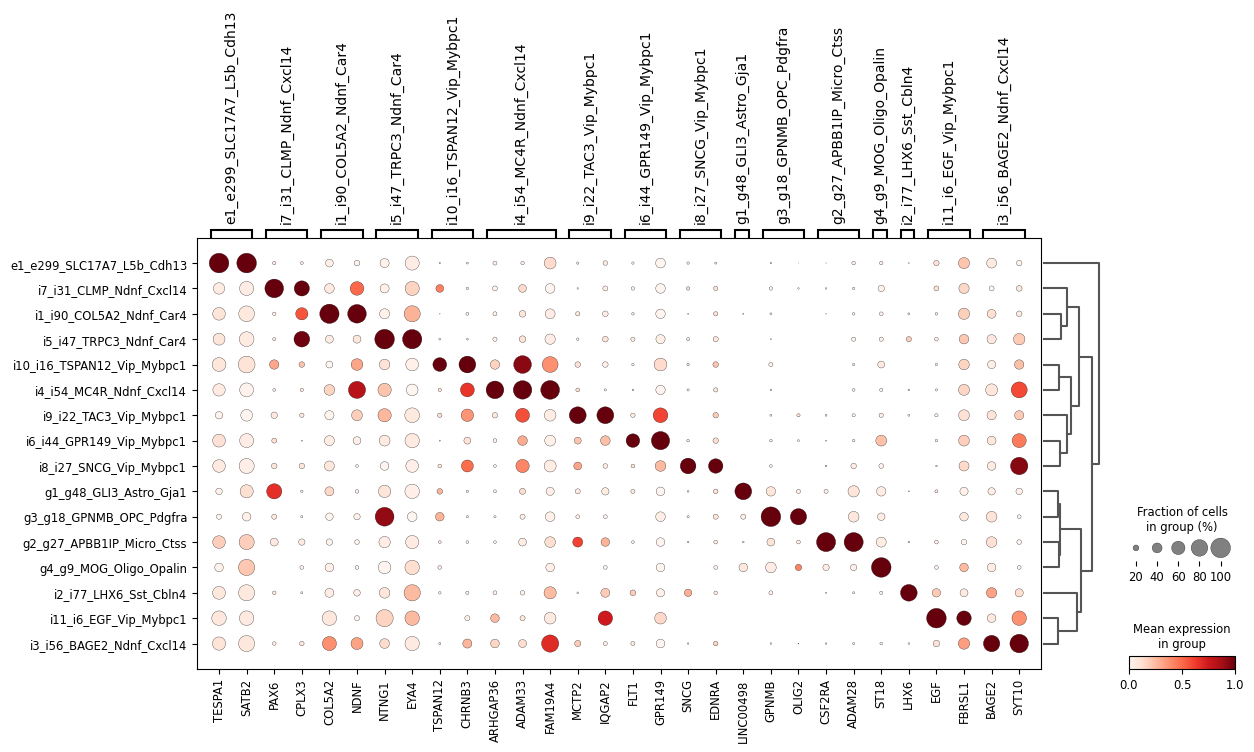

In [5]:
ns.pl.dotplot(adata, cluster_header, True, results, output_folder, outputfilename)

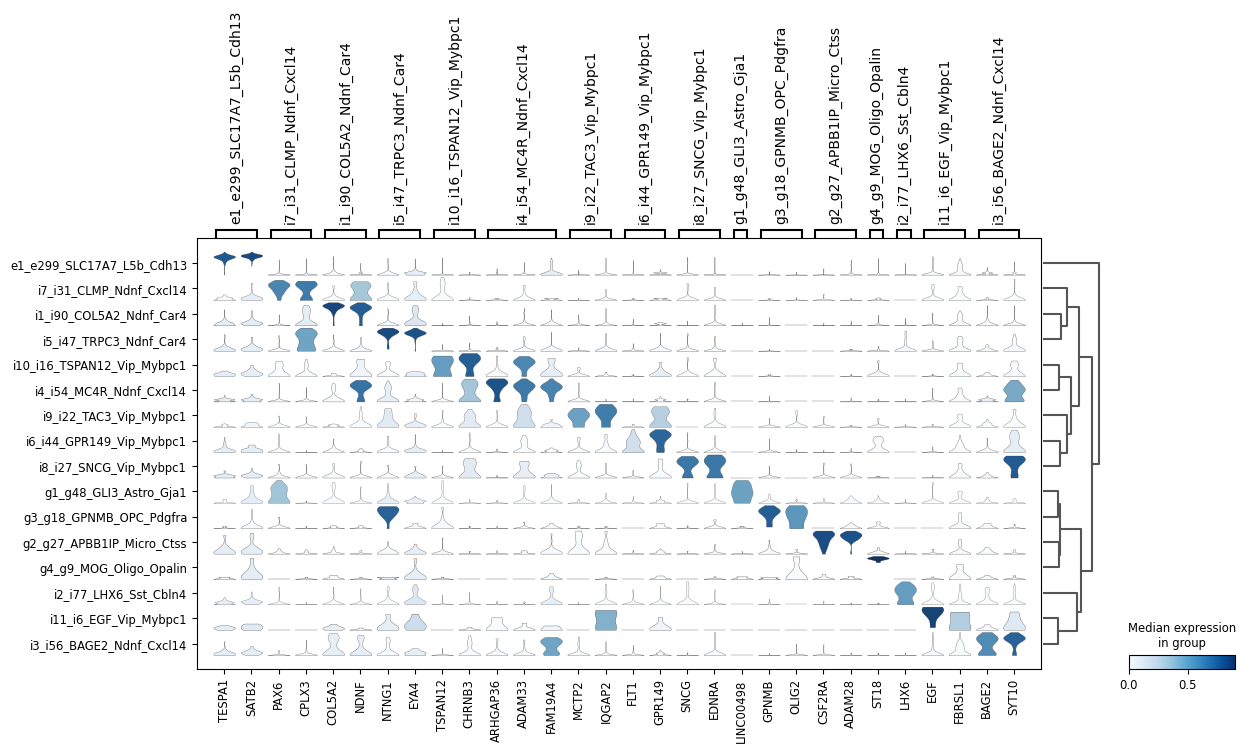

In [6]:
ns.pl.stackedviolin(adata, cluster_header, True, results, output_folder, outputfilename)

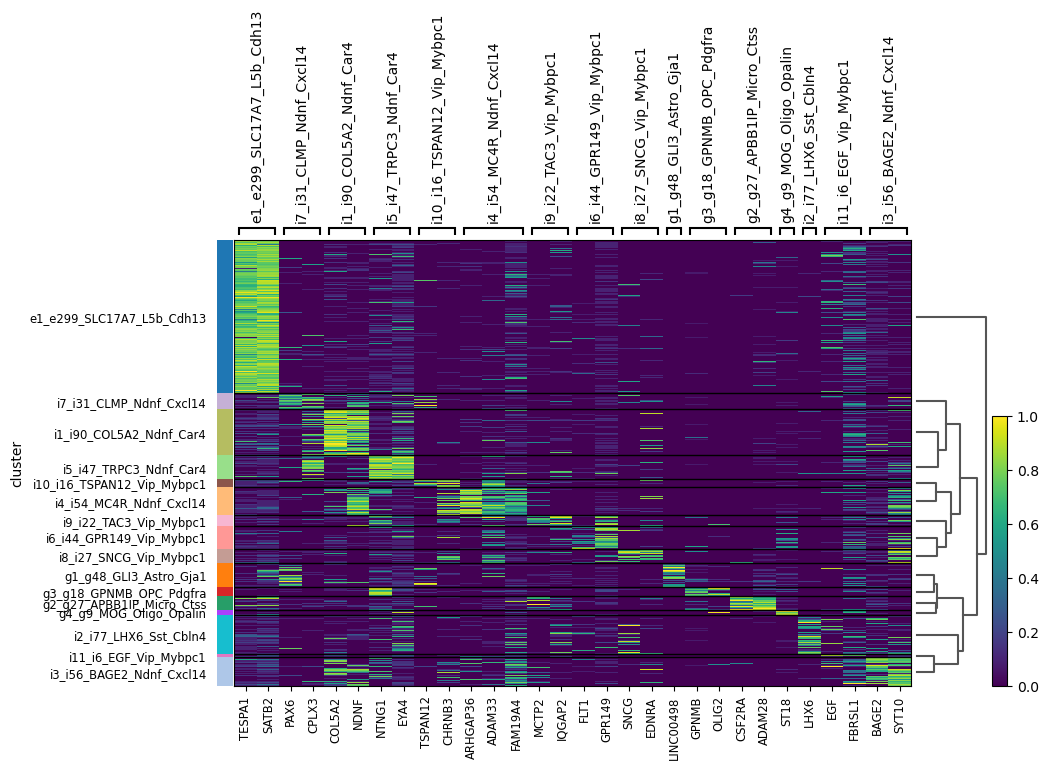

In [7]:
ns.pl.heatmap(adata, cluster_header, True, results, output_folder, "_" + outputfilename)

In [ ]:
# # If you want to specify dendrogram order
# dendrogram = adata.uns["dendrogram_cluster"]["categories_ordered"]
# dendrogram = ['i3_i56_BAGE2_Ndnf_Cxcl14', 'e1_e299_SLC17A7_L5b_Cdh13', 'i7_i31_CLMP_Ndnf_Cxcl14', 'i1_i90_COL5A2_Ndnf_Car4', 
#               'i5_i47_TRPC3_Ndnf_Car4', 'i10_i16_TSPAN12_Vip_Mybpc1', 'i4_i54_MC4R_Ndnf_Cxcl14', 
#               'i9_i22_TAC3_Vip_Mybpc1', 'i6_i44_GPR149_Vip_Mybpc1', 'i8_i27_SNCG_Vip_Mybpc1', 
#               'g1_g48_GLI3_Astro_Gja1', 'g3_g18_GPNMB_OPC_Pdgfra', 'g2_g27_APBB1IP_Micro_Ctss', 
#               'g4_g9_MOG_Oligo_Opalin', 'i2_i77_LHX6_Sst_Cbln4', 'i11_i6_EGF_Vip_Mybpc1']

In [ ]:
# ns.pl.dotplot(adata, "cluster", dendrogram, results, output_folder, outputfilename)

In [ ]:
# ns.pl.stackedviolin(adata, "cluster", dendrogram, results, output_folder, outputfilename)